# Calculating Portfolio Returns with Pandas DataFrames

## 1. Import Libraries and Dependencies

In [27]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Set the File Path to the CSVs using the Pathlib Library

In [28]:
# Set the file paths for the CSVs using the Path class from the pathlib library
mspath=Path("../Resources/MSFT.csv")
spath=Path("../Resources/SP500.csv")

## 3. Import the CSVs as Pandas DataFrames

In [29]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
microsoft_data = pd.read_csv(mspath, index_col="date", infer_datetime_format=True, parse_dates=True)
spy_data = pd.read_csv(spath,index_col="date", infer_datetime_format=True, parse_dates=True)
spy_data.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


## 4. Combine the DataFrames and Sort the Index

In [30]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
msft_spy_concat = pd.concat([microsoft_data, spy_data], axis="columns", join="inner")
# Sort datetime index in ascending order (past to present)
msft_spy_concat.sort_index(inplace=True)
# Display a few rows
msft_spy_concat.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop the Extraneous Columns

In [38]:
# Drop extra columns and only leave the close columns and associated values
msft_spy_concat.drop(columns=["volume", "open", "high", "low"], inplace=True)
msft_spy_concat.head()


,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [39]:
# Rename the columns to match the corresponding stock
msft_spy_concat.columns=["MSFT", "SP500"]
msft_spy_concat

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Calculate Daily Returns

In [41]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = msft_spy_concat.pct_change()

## 8. Calculate Daily Portfolio Returns

In [46]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights=[0.6,0.4]
portfolio_return = daily_returns.dot(weights)
portfolio_return



date
2014-05-20         NaN
2014-05-21    0.013377
2014-05-22   -0.002773
2014-05-23    0.001999
2014-05-27    0.003442
                ...   
2019-05-13   -0.027492
2019-05-14    0.009919
2019-05-15    0.008541
2019-05-16    0.017413
2019-05-17   -0.006337
Length: 1258, dtype: float64

## 9. Plot Daily Portfolio Returns

<AxesSubplot:title={'center':'Porfolio Return'}, xlabel='date'>

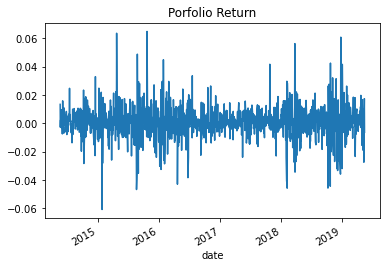

In [47]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_return.plot(title="Porfolio Return")

## 10. Calculate Cumulative Portfolio Returns

In [48]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_return = (1+ portfolio_return).cumprod()-1
cumulative_return.head()

date
2014-05-20         NaN
2014-05-21    0.013377
2014-05-22    0.010568
2014-05-23    0.012588
2014-05-27    0.016073
dtype: float64

## 11. Plot Cumulative Portfolio Returns

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='date'>

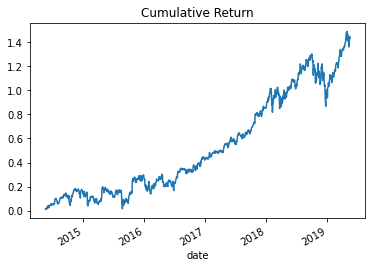

In [50]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_return.plot(title="Cumulative Return")